In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Reading The CSV
data=pd.read_csv('crime.csv',engine='python')

#Display the column names for the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
INCIDENT_NUMBER        327820 non-null object
OFFENSE_CODE           327820 non-null int64
OFFENSE_CODE_GROUP     327820 non-null object
OFFENSE_DESCRIPTION    327820 non-null object
DISTRICT               326046 non-null object
REPORTING_AREA         327820 non-null object
SHOOTING               1055 non-null object
OCCURRED_ON_DATE       327820 non-null object
YEAR                   327820 non-null int64
MONTH                  327820 non-null int64
DAY_OF_WEEK            327820 non-null object
HOUR                   327820 non-null int64
UCR_PART               327727 non-null object
STREET                 316843 non-null object
Lat                    307188 non-null float64
Long                   307188 non-null float64
Location               327820 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 42.5+ MB


In [4]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [5]:
data['INCIDENT_NUMBER'].count()

327820

In [6]:
#Districts in Boston

data['DISTRICT'].unique()


array(['E18', 'D14', 'B2', 'A1', 'A7', 'C11', nan, 'D4', 'E13', 'B3',
       'C6', 'A15', 'E5'], dtype=object)

In [7]:
data['DISTRICT'].describe()

count     326046
unique        12
top           B2
freq       51288
Name: DISTRICT, dtype: object

In [8]:
data['DISTRICT'].value_counts()

B2     51288
C11    43817
D4     43338
A1     36735
B3     36400
C6     24190
D14    20632
E13    17981
E18    17825
A7     13634
E5     13543
A15     6663
Name: DISTRICT, dtype: int64

In [9]:
#Streets

data['STREET'].unique()

array(['ARLINGTON ST', 'ALLSTON ST', 'DEVON ST', ..., 'NEWCOMB',
       'MT PLEASANT AVE', 'SAVIN HILL AV'], dtype=object)

In [22]:
data['STREET'].describe()

count            316843
unique             4684
top       WASHINGTON ST
freq              14590
Name: STREET, dtype: object

In [10]:
data['STREET'].value_counts()

WASHINGTON ST          14590
BLUE HILL AVE           8002
BOYLSTON ST             7425
DORCHESTER AVE          5297
TREMONT ST              4925
MASSACHUSETTS AVE       4865
HARRISON AVE            4739
CENTRE ST               4487
COMMONWEALTH AVE        4291
HYDE PARK AVE           3572
COLUMBIA RD             3298
HUNTINGTON AVE          3058
RIVER ST                2902
DUDLEY ST               2440
WARREN ST               2423
COLUMBUS AVE            2369
ADAMS ST                2104
BEACON ST               2016
NEWBURY ST              1937
CAMBRIDGE ST            1719
BOWDOIN ST              1718
GENEVA AVE              1681
AMERICAN LEGION HWY     1672
W BROADWAY              1661
ALBANY ST               1466
ALLSTATE RD             1332
SUMMER ST               1280
HANCOCK ST              1267
BORDER ST               1257
NEW SUDBURY ST          1253
                       ...  
42 LAWRENCE AVE            1
CORNAUBA ST                1
CAMDEN AVE                 1
COBDEN PARK   

In [11]:
#Years

data['YEAR'].unique()

array([2018, 2017, 2016, 2015], dtype=int64)

In [12]:
data['YEAR'].describe()

count    327820.000000
mean       2016.598676
std           1.009775
min        2015.000000
25%        2016.000000
50%        2017.000000
75%        2017.000000
max        2018.000000
Name: YEAR, dtype: float64

The above dataset has details for 327820 crimes in the city of Boston, for 12 districts from 2015-2018. Most of the crimes have been reported in the year 2018, maximum crimes being for B2 district and WASHINGTON ST street.

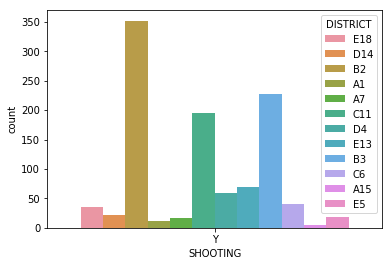

In [13]:
#District Wise Shooting Distribution

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot("SHOOTING", hue="DISTRICT", data = data)

In [15]:
#Ten Most Frequent Offenses in Boston

offense=pd.pivot_table(data.loc[:,['OFFENSE_CODE_GROUP','YEAR','OFFENSE_CODE']],index='OFFENSE_CODE_GROUP', columns='YEAR',aggfunc=np.count_nonzero)
offense.head()

OFFENSE_CODE                        
YEAR                                     2015    2016    2017    2018
OFFENSE_CODE_GROUP                                                   
Aggravated Assault                     1386.0  2365.0  2405.0  1877.0
Aircraft                                  4.0     4.0    22.0     7.0
Arson                                    11.0    34.0    32.0    18.0
Assembly or Gathering Violations        240.0   333.0   243.0   161.0
Auto Theft                              988.0  1537.0  1393.0  1036.0

In [6]:

summary=pd.DataFrame(offense.apply(np.sum,axis=1))
summary=summary.rename(columns={0:'Total Count'})
sumsort=summary.sort_values(by='Total Count',ascending=False)
top5=sumsort.iloc[0:10,:]
top5

,Total Count
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,38134.0
Larceny,26670.0
Medical Assistance,24226.0
Investigate Person,19176.0
Other,18612.0
Drug Violation,17037.0
Simple Assault,16263.0
Vandalism,15810.0
Verbal Disputes,13478.0
